# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [3]:
# stundent details example: John S. 9812
#                       student details 1: Tomer B 9333
# (if exists)           student details 2: Yahel M 1649
# (if exists)           student details 3: 
# (if exists&premitted) student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>




    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
import re
import string
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, r2_score, make_scorer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [10]:
df_train = pd.read_csv("cancer_train.csv")
df_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


In [11]:
df_test = pd.read_csv("cancer_test.csv")
df_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960,1
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,0
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,1
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834,1


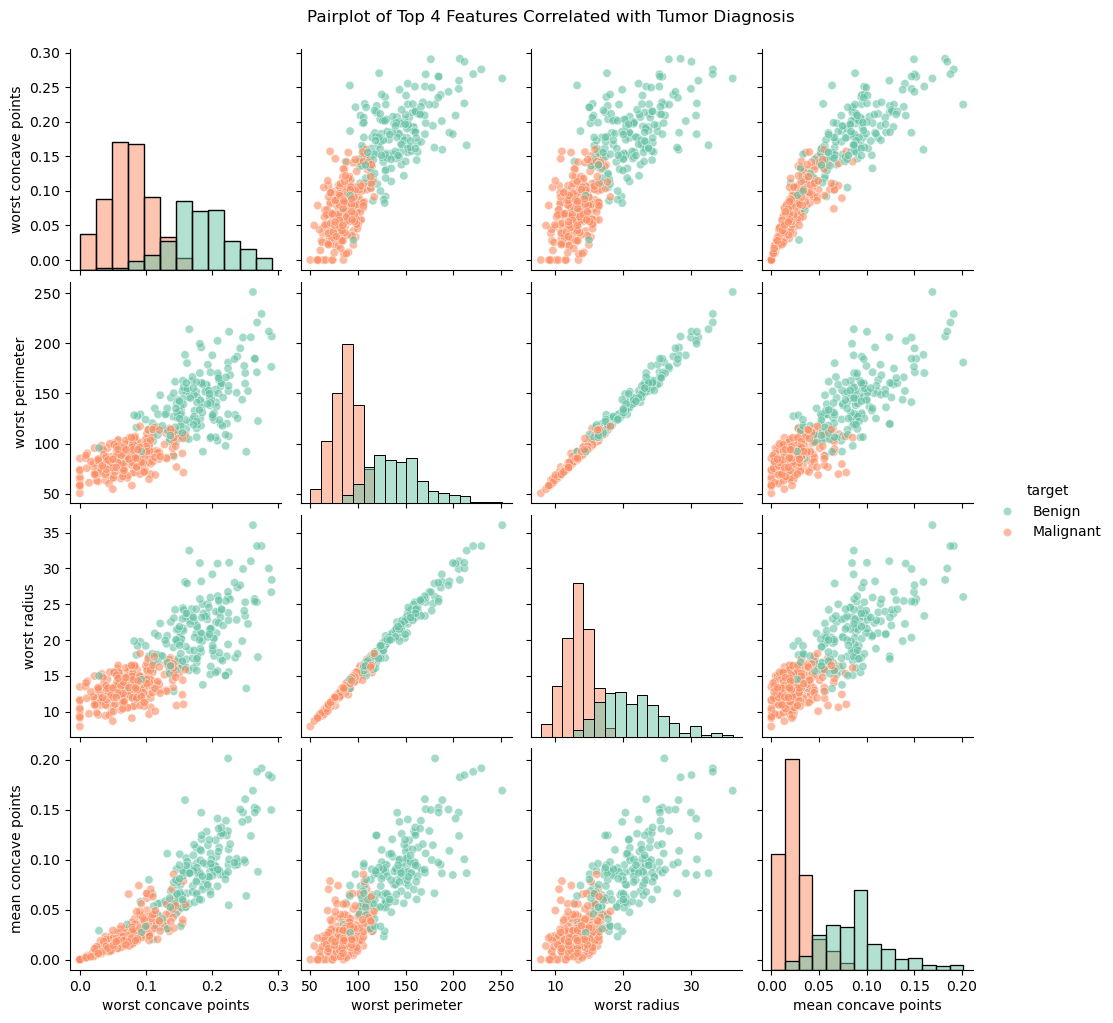

In [12]:
# This pairplot visualizes the top 4 features most correlated with the target
# It shows how the features relate to each other and how they differ between benign and malignant tumors
# The plot helps identify separability between classes and potential feature interactions

corr = df_train.corr()['target'].drop('target').abs().sort_values(ascending=False)

top_features = corr.head(4).index.tolist()

df_pairplot = df_train[top_features + ['target']].copy()

df_pairplot['target'] = df_pairplot['target'].map({0: 'Benign', 1: 'Malignant'})

sns.pairplot(df_pairplot, vars=top_features, hue='target',
             diag_kind='hist', palette='Set2',
             plot_kws={'alpha': 0.6})

plt.suptitle("Pairplot of Top 4 Features Correlated with Tumor Diagnosis", y=1.02)
plt.show()

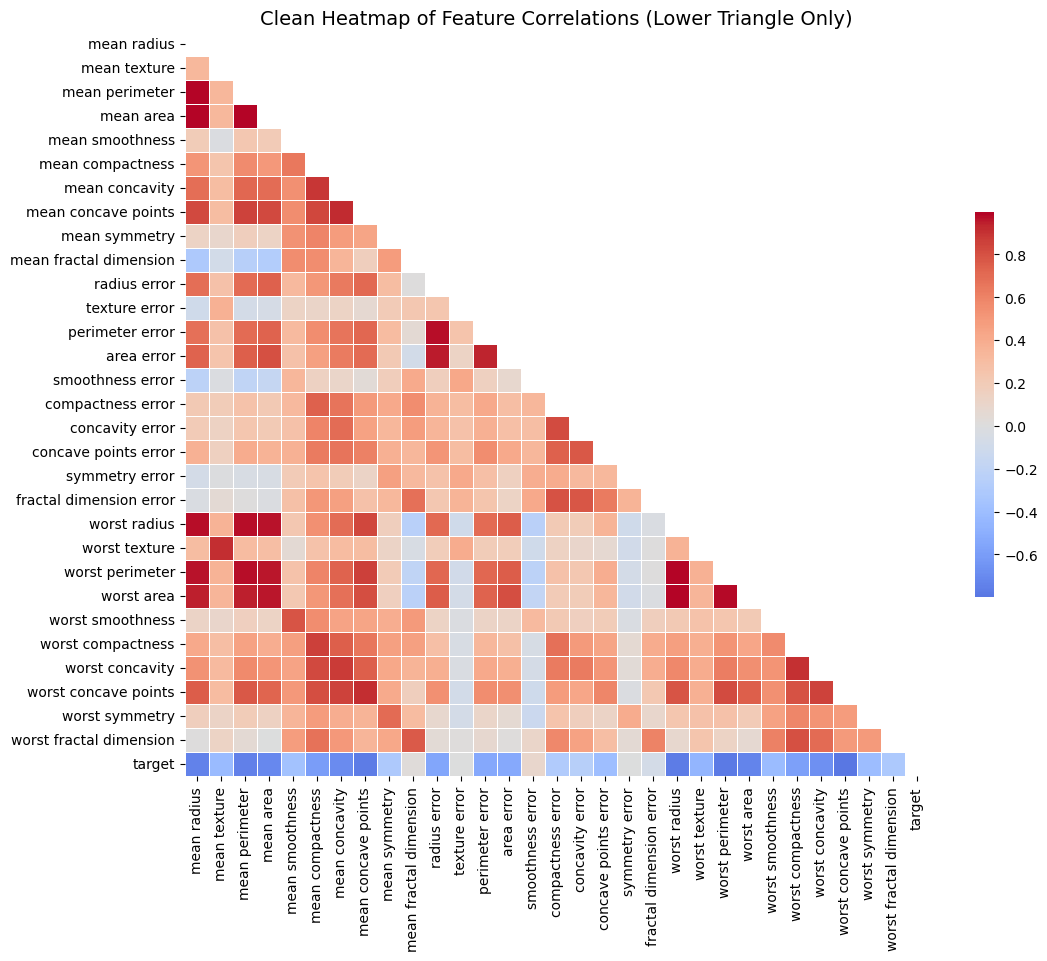

In [13]:
# This heatmap shows how features are related to each other
# Strong positive relationships are shown in blue, and strong negative ones in red
# Only half the map is shown to keep it clean and easier to read

df_numeric = df_train.select_dtypes(include=['number'])

corr = df_numeric.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot=False)

plt.title("Clean Heatmap of Feature Correlations (Lower Triangle Only)", fontsize=14)
plt.show()

In [14]:
df_numeric = df_train.select_dtypes(include='number')
df_features_only = df_numeric.drop(columns='target')
variances = df_features_only.var()
max_var_feature = variances.idxmax()
max_var_value = variances.max()
print(f"The feature with the highest variance is: '{max_var_feature}' (Variance = {max_var_value:.2f})")

The feature with the highest variance is: 'worst area' (Variance = 352956.53)


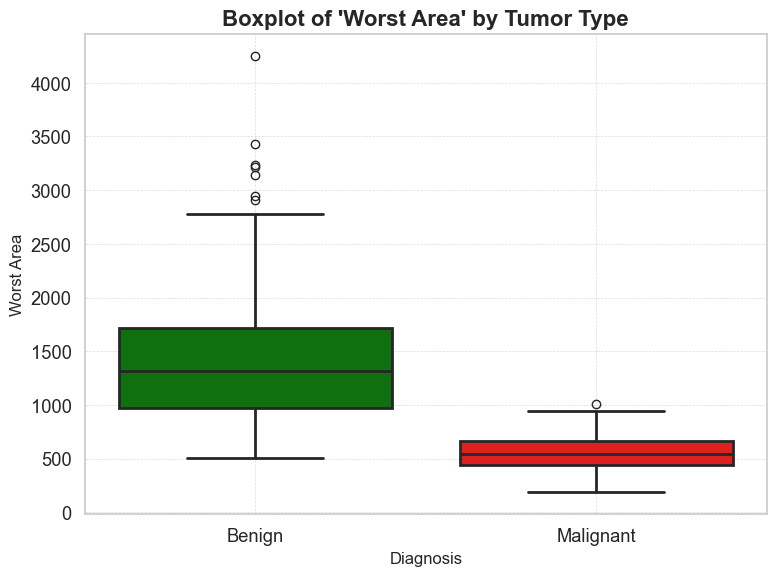

In [15]:
#This boxplot compares the 'worst area' feature between benign and malignant tumors
# It shows the distribution, medians, and outliers, helping us see if there's a clear difference between the two groups
# The colors make the contrast easy to spot

df_train['target_str'] = df_train['target'].map({0: 'Benign', 1: 'Malignant'})

sns.set(style="whitegrid", font_scale=1.2)  

plt.figure(figsize=(8, 6))
box = sns.boxplot(
    x='target_str',
    y='worst area',
    hue='target_str',
    data=df_train,
    palette={'Benign': 'green', 'Malignant': 'red'},
    linewidth=2,
    dodge=False  
)

plt.title("Boxplot of 'Worst Area' by Tumor Type", fontsize=16, weight='bold')
plt.xlabel("Diagnosis", fontsize=12)
plt.ylabel("Worst Area", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  

plt.tight_layout()
plt.show()

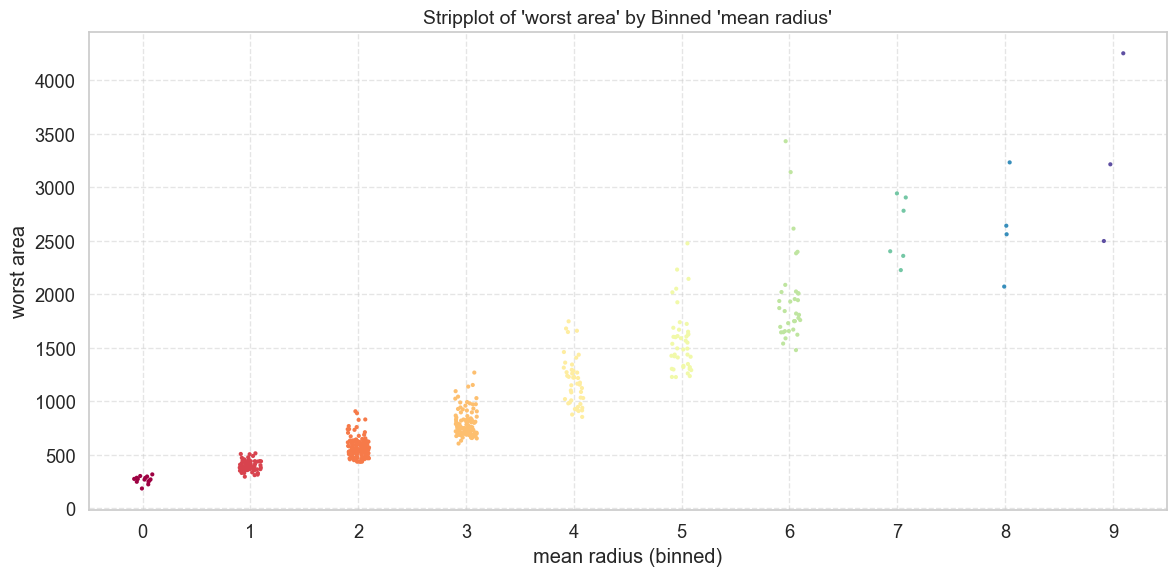

In [16]:
# This stripplot shows how the 'worst area' values change across different bins of 'mean radius'
# It helps visualize trends and density of points within each range
# We can easily spot patterns or clusters across the bins

feature_for_bins = 'mean radius'
df_train['radius_bin'] = pd.cut(df_train[feature_for_bins], bins=10, labels=False)
feature_for_y = 'worst area'

plt.figure(figsize=(12, 6))
sns.stripplot(
    x='radius_bin',
    y=feature_for_y,
    hue='radius_bin',
    data=df_train,
    palette='Spectral',
    size=3,
    jitter=True,
    dodge=False,
    legend=False
)

plt.title(f"Stripplot of '{feature_for_y}' by Binned '{feature_for_bins}'", fontsize=14)
plt.xlabel(f"{feature_for_bins} (binned)")
plt.ylabel(feature_for_y)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

### Feature Engineering

In [18]:
X_train = df_train.drop(columns=["target", "target_str", "radius_bin"], errors='ignore')
y_train = df_train["target"]
X_test = df_test.drop(columns=["target", "target_str", "radius_bin"], errors='ignore')
y_test = df_test["target"]

standard_scaler = StandardScaler()
X_train_standard = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_standard = pd.DataFrame(standard_scaler.transform(X_test), columns=X_test.columns)

print("Standard Scaled - Train:")
print(X_train_standard.head())

print("\nStandard Scaled - Test:")
print(X_test_standard.head())

Standard Scaled - Train:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    -0.301413     -0.193292       -0.277010  -0.367890         1.420887   
1    -1.271942     -0.233227       -1.260732  -1.041995        -0.490928   
2     1.615819      1.028240        1.679991   1.588252         0.854745   
3    -1.470591     -0.874532       -1.371194  -1.162538        -0.116404   
4     1.045082     -0.618480        0.989096   0.882569        -0.490203   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.327833        0.391801             0.589345       1.106432   
1         -0.796395       -0.757427            -0.878776       1.501197   
2          1.455405        1.696282             1.965235       1.540674   
3          0.350125        0.021930            -0.678692      -1.847132   
4          0.329691        0.223958             0.315679      -0.357789   

   mean fractal dimension  ...  worst radius  worst texture  worst 

In [19]:
robust_scaler = RobustScaler()
X_train_robust = pd.DataFrame(robust_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_robust = pd.DataFrame(robust_scaler.transform(X_test), columns=X_test.columns)

print("Robust Scaled - Train:")
print(X_train_robust.head())

print("\nRobust Scaled - Test:")
print(X_test_robust.head())

Robust Scaled - Train:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    -0.065537     -0.064632       -0.037360  -0.063871         1.102182   
1    -0.857175     -0.095153       -0.812728  -0.701285        -0.299627   
2     1.498305      0.868941        1.505145   1.785798         0.687068   
3    -1.019209     -0.585278       -0.899794  -0.815267        -0.025013   
4     1.032768     -0.389587        0.960583   1.118525        -0.299095   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.442603        0.567257             0.704909       0.983800   
1         -0.494965       -0.324270            -0.320253       1.307806   
2          1.382959        1.579225             1.665670       1.340206   
3          0.461193        0.280326            -0.180538      -1.440353   
4          0.444152        0.437051             0.513813      -0.217968   

   mean fractal dimension  ...  worst radius  worst texture  worst pe

## Grid Search with 5-Fold Cross Validation for Different Models and Feature Engineering

## Random Forest - Standard + Robust

In [22]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

model_rf = RandomForestClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='macro')

grid_rf_standard = GridSearchCV(model_rf, param_grid_rf, scoring=scorer, cv=cv, n_jobs=-1)
grid_rf_standard.fit(X_train_standard, y_train)

print("Random Forest + StandardScaler")
print("Best Parameters:", grid_rf_standard.best_params_)
print("Best F1 Macro Score:", grid_rf_standard.best_score_)

Random Forest + StandardScaler
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Macro Score: 0.9650552313212104


In [23]:
grid_rf_robust = GridSearchCV(model_rf, param_grid_rf, scoring=scorer, cv=cv, n_jobs=-1)
grid_rf_robust.fit(X_train_robust, y_train)

print("Random Forest + RobustScaler")
print("Best Parameters:", grid_rf_robust.best_params_)
print("Best F1 Macro Score:", grid_rf_robust.best_score_)

Random Forest + RobustScaler
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Macro Score: 0.9650552313212104


## Logistic Regression - Standard + Robust

In [25]:
param_grid_logreg = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2']
}

model_logreg = LogisticRegression(solver='liblinear', random_state=42)

grid_logreg_standard = GridSearchCV(model_logreg, param_grid_logreg, scoring=scorer, cv=cv, n_jobs=-1)
grid_logreg_standard.fit(X_train_standard, y_train)

print("Logistic Regression + StandardScaler")
print("Best Parameters:", grid_logreg_standard.best_params_)
print("Best F1 Macro Score:", grid_logreg_standard.best_score_)

Logistic Regression + StandardScaler
Best Parameters: {'C': 10.0, 'penalty': 'l2'}
Best F1 Macro Score: 0.9791675276886543


In [26]:
grid_logreg_robust = GridSearchCV(model_logreg, param_grid_logreg, scoring=scorer, cv=cv, n_jobs=-1)
grid_logreg_robust.fit(X_train_robust, y_train)

print("Logistic Regression + RobustScaler")
print("Best Parameters:", grid_logreg_robust.best_params_)
print("Best F1 Macro Score:", grid_logreg_robust.best_score_)

Logistic Regression + RobustScaler
Best Parameters: {'C': 10.0, 'penalty': 'l2'}
Best F1 Macro Score: 0.9768809196978211


## Support Vector Classifier - Standard + Robust

In [28]:
param_grid_svc = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf']
}

model_svc = SVC(random_state=42)

grid_svc_standard = GridSearchCV(model_svc, param_grid_svc, scoring=scorer, cv=cv, n_jobs=-1)
grid_svc_standard.fit(X_train_standard, y_train)

print("SVC + StandardScaler")
print("Best Parameters:", grid_svc_standard.best_params_)
print("Best F1 Macro Score:", grid_svc_standard.best_score_)

SVC + StandardScaler
Best Parameters: {'C': 10.0, 'kernel': 'linear'}
Best F1 Macro Score: 0.9769223247392261


In [29]:
grid_svc_robust = GridSearchCV(model_svc, param_grid_svc, scoring=scorer, cv=cv, n_jobs=-1)
grid_svc_robust.fit(X_train_robust, y_train)

print("SVC + RobustScaler")
print("Best Parameters:", grid_svc_robust.best_params_)
print("Best F1 Macro Score:", grid_svc_robust.best_score_)

SVC + RobustScaler
Best Parameters: {'C': 10.0, 'kernel': 'linear'}
Best F1 Macro Score: 0.9745624885384896


In [30]:
# Summary table for model, scaler, F1 score and best parameters

results = []  

# Random Forest
results.append({
    'Model': 'Random Forest',
    'Scaler': 'StandardScaler',
    'Best F1 Macro Score': grid_rf_standard.best_score_,
    'Best Params': grid_rf_standard.best_params_
})

results.append({
    'Model': 'Random Forest',
    'Scaler': 'RobustScaler',
    'Best F1 Macro Score': grid_rf_robust.best_score_,
    'Best Params': grid_rf_robust.best_params_
})

# Logistic Regression
results.append({
    'Model': 'Logistic Regression',
    'Scaler': 'StandardScaler',
    'Best F1 Macro Score': grid_logreg_standard.best_score_,
    'Best Params': grid_logreg_standard.best_params_
})

results.append({
    'Model': 'Logistic Regression',
    'Scaler': 'RobustScaler',
    'Best F1 Macro Score': grid_logreg_robust.best_score_,
    'Best Params': grid_logreg_robust.best_params_
})

# SVC
results.append({
    'Model': 'SVC',
    'Scaler': 'StandardScaler',
    'Best F1 Macro Score': grid_svc_standard.best_score_,
    'Best Params': grid_svc_standard.best_params_
})

results.append({
    'Model': 'SVC',
    'Scaler': 'RobustScaler',
    'Best F1 Macro Score': grid_svc_robust.best_score_,
    'Best Params': grid_svc_robust.best_params_
})

results_df = pd.DataFrame(results)
results_df

,Model,Scaler,Best F1 Macro Score,Best Params
0,Random Forest,StandardScaler,0.965055,"{'max_depth': None, 'min_samples_split': 2, 'n..."
1,Random Forest,RobustScaler,0.965055,"{'max_depth': None, 'min_samples_split': 2, 'n..."
2,Logistic Regression,StandardScaler,0.979168,"{'C': 10.0, 'penalty': 'l2'}"
3,Logistic Regression,RobustScaler,0.976881,"{'C': 10.0, 'penalty': 'l2'}"
4,SVC,StandardScaler,0.976922,"{'C': 10.0, 'kernel': 'linear'}"
5,SVC,RobustScaler,0.974562,"{'C': 10.0, 'kernel': 'linear'}"


In [31]:
best_result = results_df.loc[results_df['Best F1 Macro Score'].idxmax()]
print("Best Model for Step 4:")
print(best_result)

Best Model for Step 4:
Model                           Logistic Regression
Scaler                               StandardScaler
Best F1 Macro Score                        0.979168
Best Params            {'C': 10.0, 'penalty': 'l2'}
Name: 2, dtype: object


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [33]:
best_model = LogisticRegression(C=10, penalty='l2', solver='liblinear', random_state=42)
best_model.fit(X_train_standard, y_train)

y_pred = best_model.predict(X_test_standard)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("Final Test Accuracy:", accuracy)
print("Final Test F1 Macro Score:", f1)

Final Test Accuracy: 0.956140350877193
Final Test F1 Macro Score: 0.9496243923994697


## Part 5 - Apply on test and show model performance estimation

In [35]:
y_pred = best_model.predict(X_test_standard)

print("First 5 Predictions vs True Labels:")
for i in range(5):
    print(f"Prediction: {y_pred[i]}, True Label: {y_test.iloc[i]}")

f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("\nModel Performance on Test Set:")
print("Accuracy:", accuracy)
print("F1 Macro Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

First 5 Predictions vs True Labels:
Prediction: 1, True Label: 1
Prediction: 1, True Label: 1
Prediction: 0, True Label: 0
Prediction: 1, True Label: 1
Prediction: 1, True Label: 1

Model Performance on Test Set:
Accuracy: 0.956140350877193
F1 Macro Score: 0.9496243923994697

Classification Report:
              precision    recall  f1-score   support

      Benign       0.87      1.00      0.93        34
   Malignant       1.00      0.94      0.97        80

    accuracy                           0.96       114
   macro avg       0.94      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[34  0]
 [ 5 75]]
